In [1]:
import pandas as pd               #Importing the necessary libraries
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("hotel_bookings.csv")    #Reading the data file

In [6]:
# Business Question 

'''Is there a relation between the type of hotel (City Hotel and Resort Hotel) and the cancelation and 
repeated guest rates over time? What can be done to improve their customer loyalty? 
Additionally, does customer loyalty guarantee success of the hotel? '''



'Is there a relation between the type of hotel (City Hotel and Resort Hotel) and the cancelation and \nrepeated guest rates over time? What can be done to improve their customer loyalty? \nAdditionally, does customer loyalty guarantee success of the hotel? '

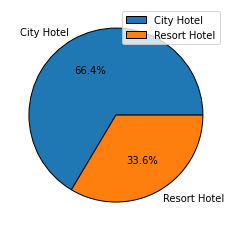

In [3]:
#Number of customers in each hotel

grouped=data['hotel']   
grouped.value_counts()  #value_counts gives the count of the number of customers in each hotel
fig,ax=plt.subplots()
ax.pie(grouped.value_counts().values,labels=grouped.value_counts().index,autopct='%1.1f%%',wedgeprops={"linewidth": 1, "edgecolor": "black"})
#wedgeprops lets you have outlines on the pie chart
ax.legend()

#This is a reason why customer loyalty does not guarantee success, city hotels nearly have twice the customers.

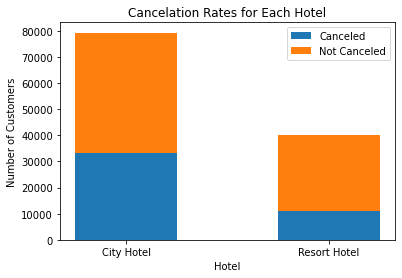

In [4]:
#This graph shows the proportion of canceled bookings for each hotel.

hotel_cancelation = data[data['is_canceled']==1].groupby('hotel') #Group by hotels for canceled bookings
hotel_not_canceled=data[data['is_canceled']==0].groupby('hotel')  #Group by hotels for bookings that are not canceled
hotels=hotel_cancelation.size().index  #.size().index gives the labels for the data
hotel_cancelation_distribution = {"Canceled": hotel_cancelation.size(),"Not Canceled": hotel_not_canceled.size()}

fig, ax = plt.subplots()
bottom = [0,0]

for cancelation, number_of_customers in hotel_cancelation_distribution.items():
    ax.bar(hotels, number_of_customers, width=0.5, label=cancelation, bottom=bottom) 
    #bottom returns the y coordinates of the bottom side of the bars. Initializing it to [0,0] allows you to stack bars on top of each other.
    bottom += number_of_customers

ax.set_title("Cancelation Rates for Each Hotel")
ax.set_xlabel("Hotel")
ax.set_ylabel("Number of Customers")
ax.legend(loc="upper right"); #loc allows you to place the legend where you want



In [5]:
#This cell is basically a data representation of the above graph.

hotel_cancellation=data[data['is_canceled']==1].groupby('hotel')
grouped=hotel_cancellation.size()
print(grouped)
for i in range(len(grouped.index)):
       print(f"{grouped.index[i]}:",grouped[i]/len(data[data['hotel']==grouped.index[i]])*100,"%") #Printing out the % of cancelations for each type of hotel.

#City hotels nearly have triple the cancellation rate.
#Additionally, nearly 42% of all city hotel's bookings are cancelled, which is a staggering amount.

hotel
City Hotel      33103
Resort Hotel    11122
dtype: int64
City Hotel: 41.727697873466866 %
Resort Hotel: 27.761275990315255 %


In [6]:
grouped=data['lead_time'].groupby(data['hotel']) #Lead time grouped by type of hotel
grouped.mean()

#Average lead times of both the hotels- It is more for city hotels.

#Lead time affects cancelation as more lead time generally means more cancelations due to change of plans and hence
#hotels try to reduce lead times.



hotel
City Hotel      109.735337
Resort Hotel     92.675253
Name: lead_time, dtype: float64

In [7]:
# Type of hotel and market segment

for i in data['hotel'].unique():  #.unique() returns the unique values of hotel(Resort and City Hotel)
    hotel_direct=len(data[(data['hotel']==i) & (data['market_segment']=='Direct')]) #Number of customers contacting the hotel directly
    hotel_direct_percent=hotel_direct/len(data[data['hotel']==i]['market_segment'])*100 #Calculating the percent
    print(f"Percentage of customers contacting",i,"directly: ",hotel_direct_percent,"%")

# Contacting the hotel directly shows more trust in the hotel.
#Resort Hotels have more than twice the percent contacting them directly as compared to City Hotels.


Percentage of customers contacting Resort Hotel directly:  16.25939145845294 %
Percentage of customers contacting City Hotel directly:  7.68047799725202 %


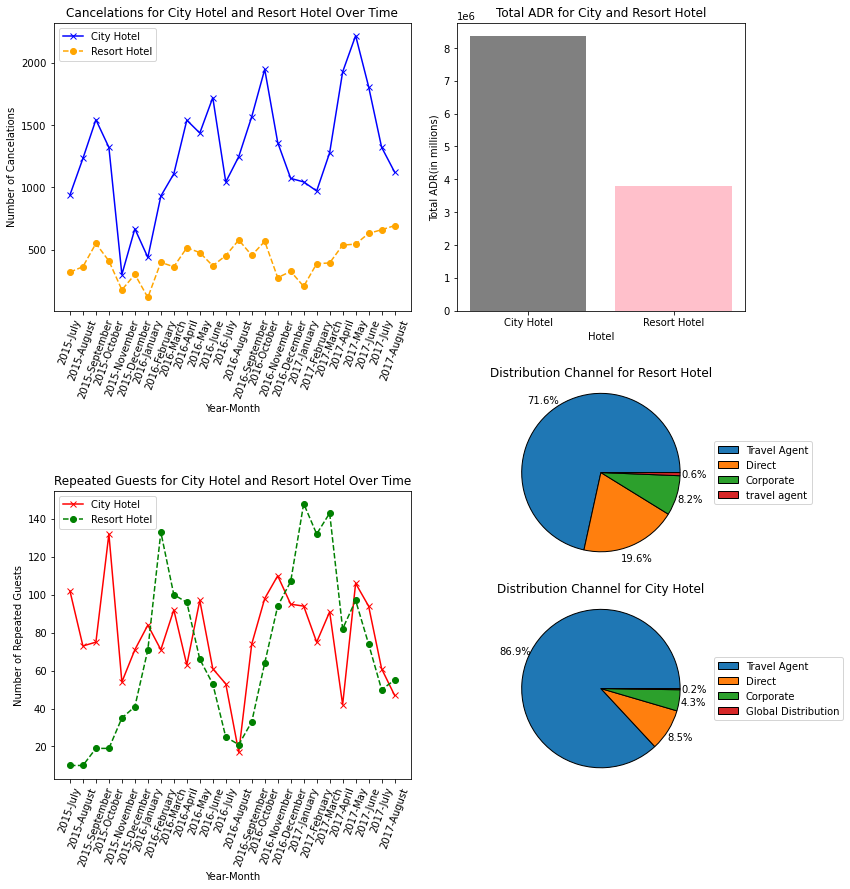

In [8]:
#Plotting all the subgraphs in one Figure

fig=plt.figure(figsize=(8,10)) #figsize lets you set the dimensions of your figure
ax1=fig.add_axes([0, 0, 0.62, 0.4])
ax2=fig.add_axes([0, 0.65,0.62, 0.4])
ax3=fig.add_axes([0.7,0.65,0.50,0.4])
ax4=fig.add_axes([0.7,0.30,0.5,0.25])
ax5=fig.add_axes([0.7,0,0.5,0.25])


#Graph 1 - Repeated Guests for both Hotels Over Time


grouped_repeated = data[(data['is_repeated_guest'] == 1) & (data['hotel'] == 'City Hotel')].groupby('arrival_date_year')['arrival_date_month']
#Grouping the dates for repeated guests in City Hotel
grouped2_repeated = data[(data['is_repeated_guest'] == 1) & (data['hotel'] == 'Resort Hotel')].groupby('arrival_date_year')['arrival_date_month']
#Grouping the dates for repeated guests in Resort Hotel

dict_dates_city_repeated = {} #This dictionary (for City Hotel) consists of 'dates' as a key with dict1_repeated as its value, and 'values' as a key with dict2_repeated as its value.
dict1_repeated={} #This dictionary consists of numbers starting from 0 as keys and the dates as values.
dict2_repeated={} #This dictionary consists  of numbers starting from 0 as keys and the number of repeated guests as values.
for i in range(len(grouped_repeated.value_counts().index)):
    dict1_repeated[i]=str(int(grouped_repeated.value_counts().index[i][0]))+"-"+grouped_repeated.value_counts().index[i][1]
    dict2_repeated[i]=grouped_repeated.value_counts().values[i]
    dict_dates_city_repeated['dates']=dict1_repeated
    dict_dates_city_repeated['values']=dict2_repeated
    
dict_dates_resort_repeated={} #This dictionary is similar, but for Resort Hotel.
dict3_repeated={}
dict4_repeated={}
for i in range(len(grouped2_repeated.value_counts().index)):
    dict3_repeated[i]=str(int(grouped2_repeated.value_counts().index[i][0]))+"-"+grouped2_repeated.value_counts().index[i][1]
    dict4_repeated[i]=grouped2_repeated.value_counts().values[i]
    dict_dates_resort_repeated['dates']=dict3_repeated
    dict_dates_resort_repeated['values']=dict4_repeated
    
def sort_chronologically(dict): #This function chronologically sorts the dictionary it receives as an input for the years 2015,2016 and 2017.
    sort_order_month=['January','February','March','April','May','June','July','August','September','October','November','December']
    sort_order=[]
    for year in ('2015','2016','2017'):
        sort_order.extend([year+"-"+sort_order_month[i] for i in range(len(sort_order_month))])
    #sort_order is a list consisting of all the Year-Months in order.
    df=pd.DataFrame(dict) #Convert the input to a dictionary
    df.index=pd.CategoricalIndex(df['dates'],categories=sort_order,ordered=True)
    #Categorical Index is a method in pandas which sets the index of 'df' based on 'categories'(sort_order in this case).
    new_df=df.sort_index().reset_index(drop=True) 
    #new_df is the new dataframe with the chronologically sorted dates. reset_index resets to the default numerical indexes of 'df'.
    return new_df
    
array_dates_city_repeated=[]
df_city_repeated=sort_chronologically(dict_dates_city_repeated) #sorted dates using sort_chronologically
for i in range(len(df_city_repeated.values)):
    array_dates_city_repeated.append(df_city_repeated.values[i][0]) #appends the sorted dates to array_dates_city_repeated.

array_values_city_repeated=[]
for i in range(len(df_city_repeated.values)):
    array_values_city_repeated.append(df_city_repeated.values[i][1]) #appends the corresponding values of the sorted dates to array_values_city_repeated.
    
array_dates_resort_repeated=[]
df_resort_repeated=sort_chronologically(dict_dates_resort_repeated) #The same procedure for resort hotel.
for i in range(len(df_resort_repeated.values)):
    array_dates_resort_repeated.append(df_resort_repeated.values[i][0])

array_values_resort_repeated=[]
for i in range(len(df_resort_repeated.values)):
    array_values_resort_repeated.append(df_resort_repeated.values[i][1])
    

ax1.plot(array_dates_city_repeated, array_values_city_repeated, marker='x', color='red', label='City Hotel')
ax1.plot(array_dates_resort_repeated, array_values_resort_repeated, marker='o', color='green', label='Resort Hotel',linestyle='dashed')
#Plots a line graph for the repeated guests for both city and resort hotel as the y-axis and the sorted dates as the x-axis.
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Number of Repeated Guests')
ax1.set_xticks(range(len(array_dates_city_repeated)))
ax1.set_xticklabels(labels=array_dates_city_repeated,rotation=70) 
ax1.set_title('Repeated Guests for City Hotel and Resort Hotel Over Time')
ax1.legend();


#Graph 2- Number of Cancelations for Both Hotels Over Time


grouped_canceled = data[(data['is_canceled'] == 1) & (data['hotel'] == 'City Hotel')].groupby('arrival_date_year')['arrival_date_month']
#Grouping the dates for canceled bookings for City Hotel.
grouped2_canceled = data[(data['is_canceled'] == 1) & (data['hotel'] == 'Resort Hotel')].groupby('arrival_date_year')['arrival_date_month']
#Grouping the dates for canceled bookings for Resort Hotel.

dict_dates_city_canceled = {} #Create an array with 'dates' as a key and dictionary of dates as its value, 'values' as another key and corresponding cancellations as its value.
dict1_canceled={} #Dictionary consisting of dates
dict2_canceled={} #Dictionary consisting of corresponding values
for i in range(len(grouped_canceled.value_counts().index)):
    dict1_canceled[i]=str(int(grouped_canceled.value_counts().index[i][0]))+"-"+grouped_canceled.value_counts().index[i][1]
    dict2_canceled[i]=grouped_canceled.value_counts().values[i]
    dict_dates_city_canceled['dates']=dict1_canceled
    dict_dates_city_canceled['values']=dict2_canceled
    
dict_dates_resort_canceled={}
dict3_canceled={}
dict4_canceled={}
for i in range(len(grouped2_canceled.value_counts().index)):
    dict3_canceled[i]=str(int(grouped2_canceled.value_counts().index[i][0]))+"-"+grouped2_canceled.value_counts().index[i][1]
    dict4_canceled[i]=grouped2_canceled.value_counts().values[i]
    dict_dates_resort_canceled['dates']=dict3_canceled
    dict_dates_resort_canceled['values']=dict4_canceled
    
array_dates_city_canceled=[]
df_city_canceled=sort_chronologically(dict_dates_city_canceled)#Use sort_chronologically to sort the dates and append it to array_dates_city_canceled.
for i in range(len(df_city_canceled.values)):
    array_dates_city_canceled.append(df_city_canceled.values[i][0])

array_values_city_canceled=[] #Append the corresponding values of the dates to this array.
for i in range(len(df_city_canceled.values)):
    array_values_city_canceled.append(df_city_canceled.values[i][1])
    
array_dates_resort_canceled=[]
df_resort_canceled=sort_chronologically(dict_dates_resort_canceled)
for i in range(len(df_resort_canceled.values)):
    array_dates_resort_canceled.append(df_resort_canceled.values[i][0])

array_values_resort_canceled=[]
for i in range(len(df_resort_canceled.values)):
    array_values_resort_canceled.append(df_resort_canceled.values[i][1])
    

ax2.plot(array_dates_city_canceled, array_values_city_canceled, marker='x', color='blue', label='City Hotel')
ax2.plot(array_dates_resort_canceled, array_values_resort_canceled, marker='o', color='orange', label='Resort Hotel',linestyle='dashed')
ax2.set_xticks(range(len(array_dates_city_canceled)))
ax2.set_xticklabels(labels=array_dates_city_canceled,rotation=70)
ax2.set_xlabel('Year-Month')
ax2.set_ylabel('Number of Cancelations')
ax2.set_title('Cancelations for City Hotel and Resort Hotel Over Time')
ax2.legend();


#Graph 3- Total ADR(Average Daily Rate) for City and Resort Hotel


grouped_adr=data['adr'].groupby(data['hotel']) #Group the ADR by hotel.
ax3.bar(grouped_adr.sum().index,grouped_adr.sum().values,color=['grey','pink']) #Plot the total ADR as the y-axis and the type of hotel as the x-axis.
ax3.set_title("Total ADR for City and Resort Hotel")
ax3.set_xlabel("Hotel")
ax3.set_ylabel("Total ADR(in millions)")


#Graphs 4 and 5- Distribution Channels for City and Resort Hotels


count=4 #Have a count to plot two different pie charts with ax4 and ax5 respectively.

for hotel_type in data['hotel'].unique():
    hotel_market_segment = data[(data['hotel'] == hotel_type) & (data['distribution_channel']!='Undefined')]['distribution_channel'] #Loop through the unique values of hotel and group by distribution channel(excluding Undefined).
    if count==4:
        ax4.pie(hotel_market_segment.value_counts().values,labels=None, autopct='%1.1f%%',wedgeprops={"linewidth": 1, "edgecolor": "black"},pctdistance=1.175,radius=1.1)  #pctdistance can be used to adjust the distance between the percents and the pie chart.
        ax4.set_title("Distribution Channel for "+hotel_type)
        ax4.legend(labels=hotel_market_segment.value_counts().index,loc='center left',bbox_to_anchor=(1.1, 0.5))
        #bbox_to_anchor is used to position the label outside the pie chart, loc is used to specify its approximate location.
    else:
        ax5.pie(hotel_market_segment.value_counts().values,labels=None, autopct='%1.1f%%',wedgeprops={"linewidth": 1, "edgecolor": "black"},pctdistance=1.175,radius=1.1)
        ax5.set_title("Distribution Channel for "+hotel_type)
        ax5.legend(labels=hotel_market_segment.value_counts().index,loc='center left',bbox_to_anchor=(1.1, 0.5))
    count+=1


# Mini-Report 




## _Business Question_
***
My business question is as follows: **Is there a relation between the type of hotel and the cancelation and repeated guest rates? What can be done to improve customer loyalty? Additionally, does customer loyalty guarantee success of hotels?**



## _Relevance_
***
My business question is highly relevant as:
- Huge role of **customer loyalty** in a hotel's success.
- **Cancelation rate** is something which every hotel has to deal with and hence, is significant.
- Important to address the **false conception** of customer loyalty translating to success.

## _Data Justification_
***

The following is the canvas containing the subgraphs:

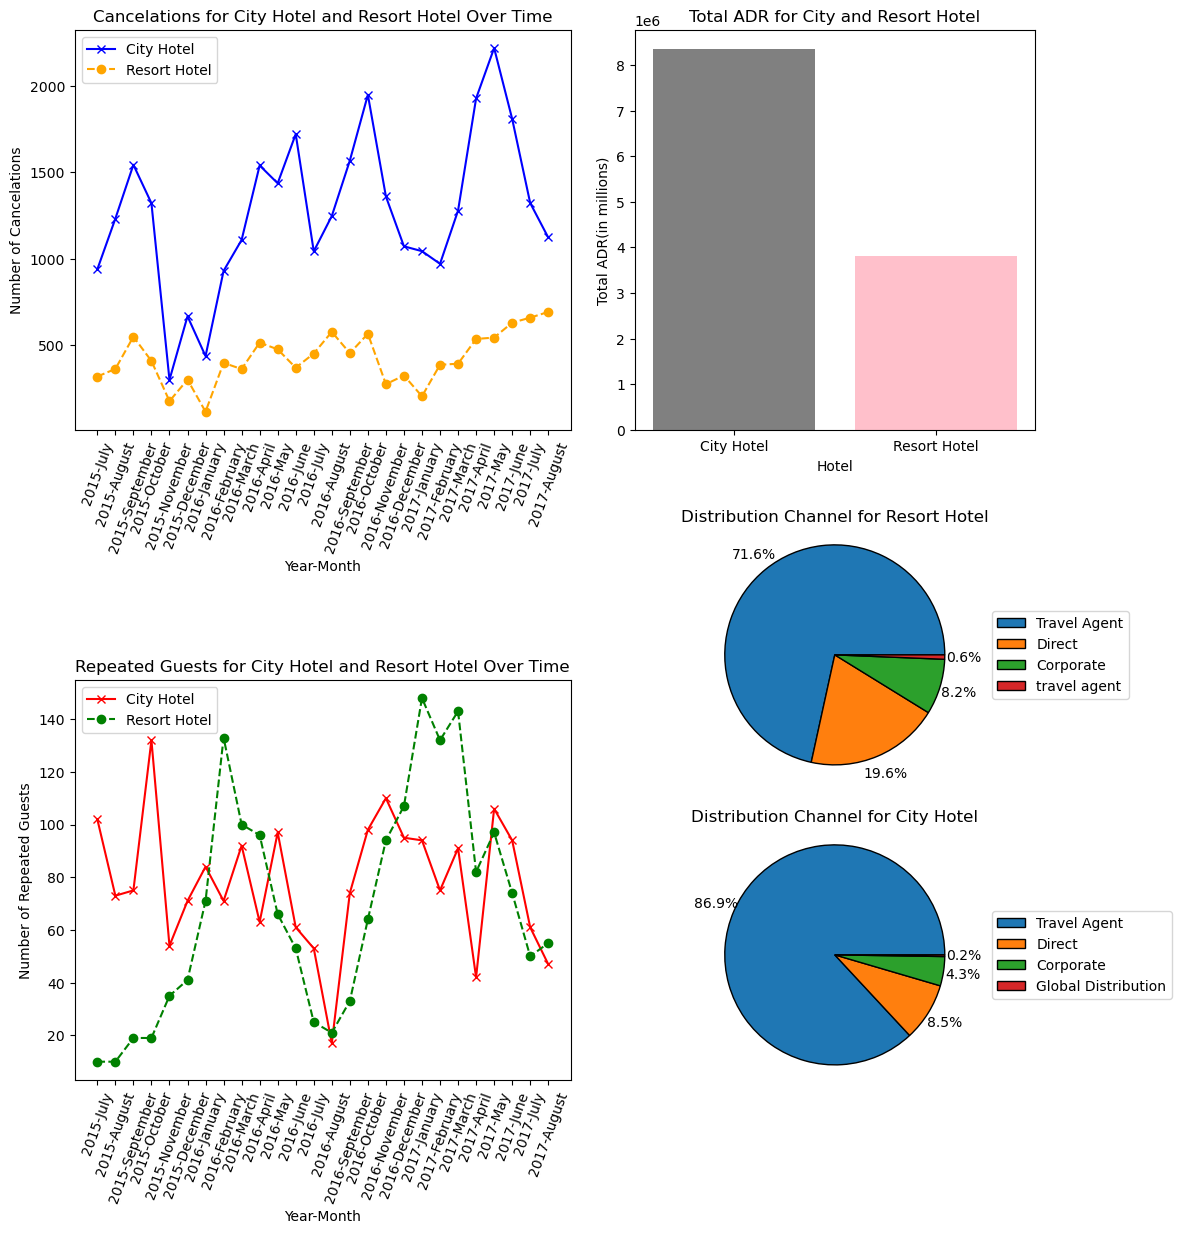


The suitable attributes I selected from the dataset are:
- **Cancelation Rate and Repeated Guest Rate**: Main attributes for analyzing customer loyalty.
- **Average Daily Rate(ADR)**: Highlights the success of a hotel.
- **Distribution Channel and Lead Time**: Critical to show how the hotels can improve their customer loyalty.

## _Findings and Insights_
***

- The line graphs suggest that while **City Hotels** have always had a **higher cancelation rate**, after October 2015, both the types of hotels have had pretty much the **same repeated guest rates**, Resort Hotels even being higher in few months. This shows that the cancelation rate can definitely impact customer loyalty as **a higher cancelation rate shows lesser credibility**.
- The two pie charts illustrate that  **Resort Hotels** have a much **higher proportion of customers contacting them directly**, which shows that their customers trust them more. 
- City Hotels can aim to build the trust of its customers and work on **targeted promotions and better customer service**. They can aim to **reduce their booking lead times**, which directly impact cancelation rates.
- Finally, the total ADR graph highlights that **customer loyalty does not guarantee the success** of hotels as City Hotels earn nearly **double** the amount as its counterpart. Resort Hotels can aim to profit through their ADR.